In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt


In [2]:
dataset = pd.read_csv("facial_expressions/data/legend.csv")
dataset = dataset.drop(["user.id"], axis=1)
dataset['emotion'] = dataset['emotion'].str.lower()

In [3]:
class_mapping = dict( zip( dataset["emotion"].astype('category').cat.codes, dataset["emotion"]))
dataset["emotion_class"] = dataset["emotion"].astype('category').cat.codes

In [5]:
dataset

,image,emotion,emotion_class
0,facial-expressions_2868588k.jpg,anger,0
1,facial-expressions_2868585k.jpg,surprise,7
2,facial-expressions_2868584k.jpg,disgust,2
3,facial-expressions_2868582k.jpg,fear,3
4,Aaron_Eckhart_0001.jpg,neutral,5
...,...,...,...
13685,SharmilaTagore_80.jpg,happiness,4
13686,SharmilaTagore_81.jpg,happiness,4
13687,SharmilaTagore_82.jpg,happiness,4
13688,SharmilaTagore_83.jpg,happiness,4


In [6]:
data = np.zeros((len(dataset), 128, 128, 3))

for i in range(len(dataset)):
    data[i] = cv2.resize(cv2.imread("facial_expressions/images/" + dataset['image'].iloc[i]), (128,128)) / 255.             # resizing due to colab RAM constraints and then normalize



# Flattened image data for non-spatial models
data = data.reshape(len(data), -1)

In [25]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, verbose=3, random_state=77, n_jobs=16).fit_transform(data)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 13690 samples in 0.414s...
[t-SNE] Computed neighbors for 13690 samples in 33.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13690
[t-SNE] Computed conditional probabilities for sample 2000 / 13690
[t-SNE] Computed conditional probabilities for sample 3000 / 13690
[t-SNE] Computed conditional probabilities for sample 4000 / 13690
[t-SNE] Computed conditional probabilities for sample 5000 / 13690
[t-SNE] Computed conditional probabilities for sample 6000 / 13690
[t-SNE] Computed conditional probabilities for sample 7000 / 13690
[t-SNE] Computed conditional probabilities for sample 8000 / 13690
[t-SNE] Computed conditional probabilities for sample 9000 / 13690
[t-SNE] Computed conditional probabilities for sample 10000 / 13690
[t-SNE] Computed conditional probabilities for sample 11000 / 13690
[t-SNE] Computed conditional probabilities for sample 12000 / 13690
[t-SNE] Computed conditional probabilities for sa

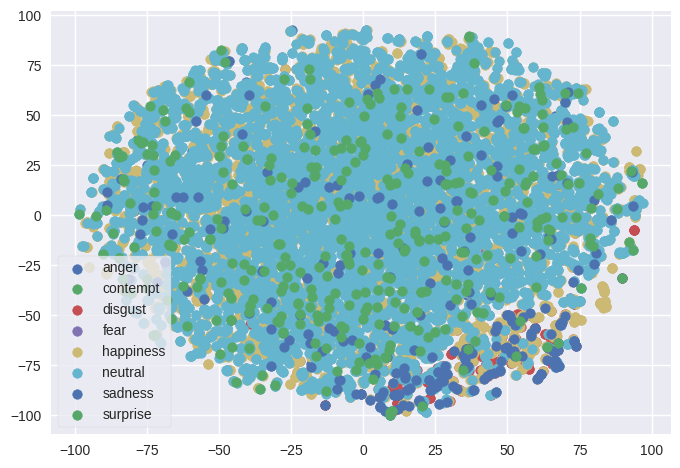

In [35]:
for i in np.unique(dataset['emotion_class']):
    plt.scatter(X_embedded[dataset[dataset['emotion_class']==i].index.values,0], X_embedded[dataset[dataset['emotion_class']==i].index.values,1], label = class_mapping[i])
plt.legend(frameon=True)
plt.show()

In [32]:
plt.style.use('seaborn-v0_8')